In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate

Welcome to JupyROOT 6.24/06


### 1.1

In [2]:
data=np.loadtxt('1_1.txt') #importiere Daten
print(data)
Schirm=data[:,0]
Quelle=data[:,1]
Abstand=Schirm-Quelle
print('experimenteller Wert für die Brennweite:',np.mean(Abstand),'\pm',np.sqrt(np.var(Abstand)))

[[0.473 0.31 ]
 [0.46  0.31 ]
 [0.457 0.31 ]
 [0.466 0.31 ]]
experimenteller Wert für die Brennweite: 0.15400000000000003 \pm 0.006123724356957931


### 1.2

In [3]:
L=1.31-0.35
data=np.loadtxt('1.2a).txt', skiprows=3) #importiere Daten
F1=data[:,0]
F2=data[:,1]
e= F2-F1

In [4]:
f=(e**2-L**2)/(-4*L)
f_m1=f

In [5]:
print('Das sind die einzelnen Brennweiten der Messung:',f)

Das sind die einzelnen Brennweiten der Messung: [0.15026849 0.15087891 0.15269766 0.15148724 0.14687396 0.14625
 0.14811563 0.14625    0.15449766 0.1499625  0.15269766 0.15239583
 0.14934896 0.14934896 0.15118333 0.14934896]


In [6]:
f1 = f[:4]
f2 = f[:8]
f2 = f2[4:]
f3 = f[:12]
f3 = f3[8:]
f4 = f[:16]
f4 = f4[12:]
f11 = ufloat(np.mean(f1),np.sqrt(np.var(f1)))
f21 = ufloat(np.mean(f2),np.sqrt(np.var(f2)))
f31 = ufloat(np.mean(f3),np.sqrt(np.var(f3)))
f41 = ufloat(np.mean(f4),np.sqrt(np.var(f4)))
print('Mittelwert erster Teil:',f11,'\n','Mittelwert zweiter Teil:',f21,'\n','Mittelwert dritter Teil:',f31,'\n','Mittelwert vierter Teil:',f41)

Mittelwert erster Teil: 0.1513+/-0.0009 
 Mittelwert zweiter Teil: 0.1469+/-0.0008 
 Mittelwert dritter Teil: 0.1524+/-0.0016 
 Mittelwert vierter Teil: 0.1498+/-0.0008


zweite Messreihe

In [7]:
L=1.54-0.35
data=np.loadtxt('1.2b).txt', skiprows=3) #importiere Daten
F3=data[:,0]
F4=data[:,1]
e= F4-F3
print(F4)
print(e)
print(L)

[1.372 1.365 1.386 1.376 1.379 1.381 1.377 1.376 1.384 1.378 1.376 1.373
 1.386 1.376 1.381 1.39 ]
[0.833 0.825 0.849 0.835 0.843 0.844 0.839 0.841 0.838 0.839 0.832 0.833
 0.842 0.835 0.842 0.854]
1.19


In [8]:
f=(e**2-L**2)/(-4*L)
f_m2=f

In [9]:
print('Das sind die einzelnen Brennweiten der Messung:',np.round(f,decimals=4))
len(f)

Das sind die einzelnen Brennweiten der Messung: [0.1517 0.1545 0.1461 0.151  0.1482 0.1478 0.1496 0.1489 0.15   0.1496
 0.1521 0.1517 0.1486 0.151  0.1486 0.1443]


16

In [10]:
f5 = f[:4]
f6 = f[:8]
f6 = f6[4:]
f7 = f[:12]
f7 = f7[8:]
f8 = f[:16]
f8 = f8[12:]
f51 = ufloat(np.mean(f5),np.sqrt(np.var(f5)))
f61 = ufloat(np.mean(f6),np.sqrt(np.var(f6)))
f71 = ufloat(np.mean(f7),np.sqrt(np.var(f7)))
f81 = ufloat(np.mean(f8),np.sqrt(np.var(f8)))
print('Mittelwert fünfter Teil:',f51,'\n','Mittelwert sechster Teil:',f61,'\n','Mittelwert siebter Teil:',f71,'\n','Mittelwert achter Teil:',f81)

Mittelwert fünfter Teil: 0.1508+/-0.0030 
 Mittelwert sechster Teil: 0.1486+/-0.0007 
 Mittelwert siebter Teil: 0.1508+/-0.0011 
 Mittelwert achter Teil: 0.1481+/-0.0024


In [11]:
f_ges=np.append(f_m1,f_m2, axis=0)
print('gesamte brennweite:',np.mean(f_ges),'\pm',np.sqrt(np.var(f_ges)))
f100= f5+f1

gesamte brennweite: 0.1498540524608281 \pm 0.0023805301893994896


In [12]:
f9 = np.append(f5,f1)
f10 = np.append(f6,f2)
f11 = np.append(f7,f3)
f12 = np.append(f8,f4)

In [14]:
f91 = ufloat(np.mean(f9),np.sqrt(np.var(f9)))
f101 = ufloat(np.mean(f10),np.sqrt(np.var(f10)))
f111 = ufloat(np.mean(f11),np.sqrt(np.var(f11)))
f121 = ufloat(np.mean(f12),np.sqrt(np.var(f12)))
print('Mittelwert fünfter Teil:',f91,'\n','Mittelwert sechster Teil:',f101,'\n','Mittelwert siebter Teil:',f111,'\n','Mittelwert achter Teil:',f121)

Mittelwert fünfter Teil: 0.1511+/-0.0023 
 Mittelwert sechster Teil: 0.1478+/-0.0011 
 Mittelwert siebter Teil: 0.1516+/-0.0016 
 Mittelwert achter Teil: 0.1490+/-0.0020


### 1.3

In [31]:
data=np.loadtxt('1.3a).txt', skiprows=4)
d1=0.06
x1=data[:,0]
abb1=data[:,1]
abb_geg1=data[:,2]
z1 = 1/abb1 +1

In [18]:
data=np.loadtxt('1.3b).txt', skiprows=4)
d2=0.07
x2=data[:,0]
abb2=data[:,1]
abb_geg2=data[:,2]

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


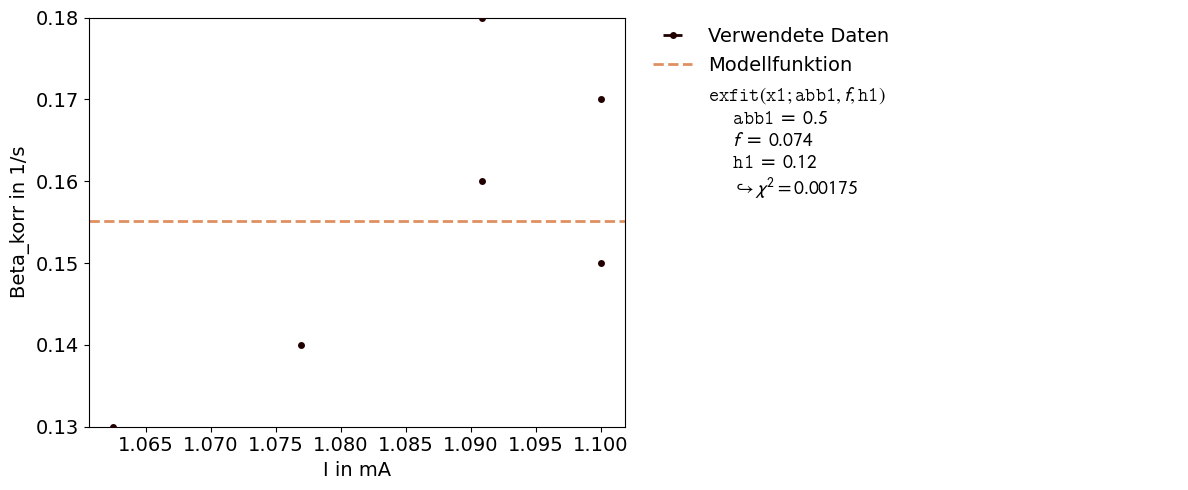

In [32]:
xy_data = XYContainer(z1,x1)
def exfit(x1, abb1, f=0.15, h1=1):
    return f*abb1 + h1

line_fit=Fit(data=xy_data,model_function=exfit)
line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"
line_fit.do_fit()
line_fit.data_container.axis_labels = ["I in mA", "Beta_korr in 1/s"]

plot = Plot(fit_objects=line_fit)

plot.plot()
plot.save('BetaueberI.png')
plot.show()
